# Homework 2
## ROB-GY 6333 Swarm Robotics
## Alejandro Ojeda Olarte

In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

### Exercise 1
1. To prove it is a constant of motion, we take the derivative
$$\frac{d}{dx}(q_1^T x)=q_1^T \dot{x}$$
But due to the agreement protocol $\dot{x} = -Lx$
$$\frac{d}{dx}(q_1^T x)=-q_1^T Lx$$

And given that $q_1^T L=0$
$$\frac{d}{dx}(q_1^T x)=0$$
So it is a constant of motion.

2. Graph B contains a rooted-out branch, as well as A and D, but C does not, so it won't converge. The value they converge to, does depend on the initial conditions.

3. Laplacian

Let's consider the $x_0$ values from a series of x coordinates from a series of robots. We need 8 values for the eight robots in the system.

In [3]:
EdgeA=np.array([[0,1],[0,2],[1,4],[2,3],[2,7],[3,0],[3,4],[3,6],[4,5],[6,3]])
Vertices=np.array([0,1,2,3,4,5,6,7])
x_0 = np.array([20, 10, 15, 12, 30, 12, 15, 16])

def getLaplacianMatrix(edgesA,Vertices):
    
    adjencyMatrix = np.zeros((len(Vertices),len(Vertices)))
    for edge in edgesA:
        i = edge[1]  #head
        j = edge[0]  #tail
        adjencyMatrix[i][j] = 1
    
    #print("Adjacency Matrix is: ",adjencyMatrix)
    row_sums = np.sum(adjencyMatrix, axis=1)
    diagonal_matrix = np.diag(row_sums)
    #print("\nDegree Matrix is: ",diagonal_matrix)
    return diagonal_matrix - adjencyMatrix

def getConsensusValue(x_0,L):
    eigenVals, leftEigenVectors = scipy.linalg.eig(L, left=True, right=False)
    eigenVals = np.real(eigenVals)
    leftEigenVectors = np.real(leftEigenVectors)
    norm=np.linalg.norm(leftEigenVectors)
    leftEigenVectors=leftEigenVectors/norm

    
    #print("Eigen values are: ",eigenVals[6])
    arr = np.array(eigenVals.real).tolist()
    min_index = arr.index(min(arr))
    leftEigenVectors = np.divide(leftEigenVectors[:,min_index],sum(leftEigenVectors[:,min_index]))

    #print("\nLeft Eigen Vectors are: ",leftEigenVectors[6])

    oneVector = np.ones(len(x_0)).reshape(-1,1)
    #print(leftEigenVectors.reshape(-1,1))
    agreeStep=np.matmul(leftEigenVectors,oneVector)
    agreementValue= np.matmul(leftEigenVectors,x_0)
    return agreementValue

def simConsensus (x_0, T, L, dt=0.001):
    time_arr = np.arange(0,T,dt)
    
    # initialize x
    x = np.zeros((len(x_0),len(time_arr)))
    x[:,0] = x_0     # So that its the first one
   
    for i in range(0,len(time_arr)-1) :
        x[:,i+1] = (np.matmul((-1)*L,x[:,i]))*dt + x[:,i] # Multiply -Lx + the old value to get the new value
        
    for j in range(0,len(x_0)):
        plt.plot(time_arr,x[j,:])    

    plt.ylabel('Robots position')
    plt.xlabel('T (s)')
    plt.show()


In [4]:
T=100
x_0=np.array([1.5,4.3,2.6,3.1,1.7,2.8,3.9,4.1]) #Random initial vector of x positions
#x_0 = [20, 10, 15, 12, 30, 12, 15, 16]

#verticesA = ["A", "B", "C", "D","E","F","G","H"]
vertices=[0,1,2,3,4,5,6,7]
edgesA=[(0, 1), (0, 2), (3, 0), (2, 3), (2, 7), (3, 4), (3, 6), (6, 3), (1, 4), (4, 5)]

T=20
edgesB=[(0, 1), (0, 2), (0, 3), (1, 4), (3, 6), (2, 5), (4, 7)]
edgesD= [(0, 3), (1, 0), (3, 1), (1, 2), (2, 1), (3, 5), (4, 3), (5, 6), (6, 7), (7, 4)]

#simConsensus(x_0, T, getLaplacian(edgesA,vertices), dt =0.001)

print("Value where each will converge")
print(f"Left eigenvector of A * x_p = {getConsensusValue(x_0,getLaplacianMatrix(edgesA,vertices))}")
print(f"Left eigenvector of B * x_p = {getConsensusValue(x_0,getLaplacianMatrix(edgesB,Vertices))}")
print(f"Left eigenvector of D * x_p = {getConsensusValue(x_0,getLaplacianMatrix(edgesD,Vertices))}")


Value where each will converge
Left eigenvector of A * x_p = 2.775
Left eigenvector of B * x_p = 1.5
Left eigenvector of D * x_p = 2.999999999999999


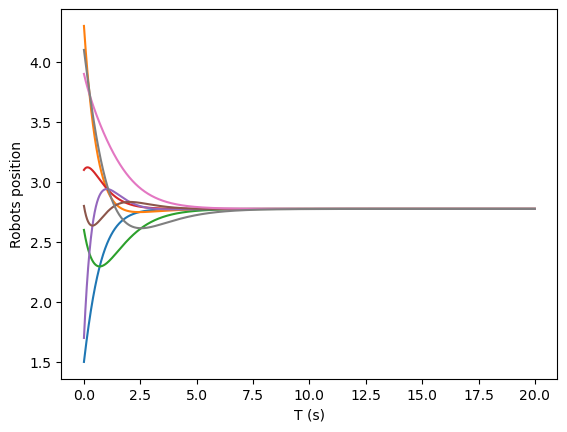

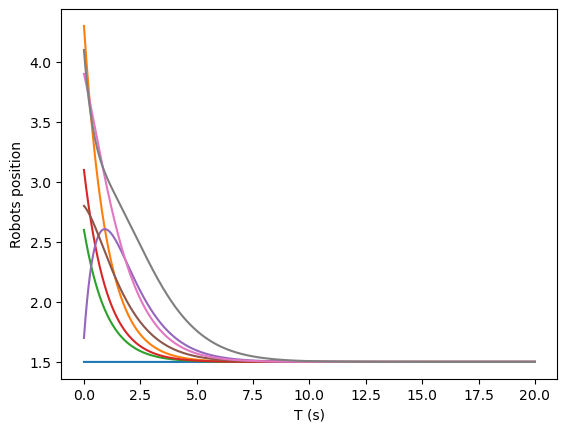

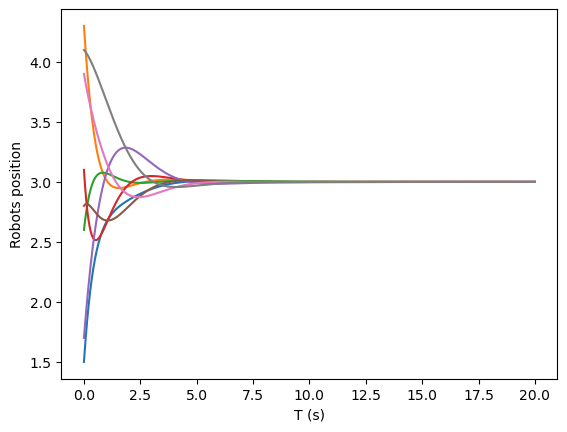

In [5]:
simConsensus(x_0, T, getLaplacianMatrix(EdgeA,Vertices), dt =0.001)
simConsensus(x_0, T, getLaplacianMatrix(edgesB,Vertices), dt =0.001)
simConsensus(x_0, T, getLaplacianMatrix(edgesD,Vertices), dt =0.001)

## Exercise 2

1. The fixed points are the locations where the derivative is 0, as it must be constant

$$\dot{x}=0$$
$$\dot{y}=0$$

Which happens at $x=y$ and $x=-y$, therefore is when $x = 0$ and $y=0$

2. For
* $V_1$ is positive definite, and
$$\dot{V_1} = x \dot{x} + 2y \dot{y}$$

$$
= x(-x+y) + 2y(-x-y) \\
= -x^2 + xy - 2xy - 2y^2 \\
= -x^2 - y^2 - xy \\
= -\frac{x^2}{2} - \frac{x^2}{2} - y^2 - xy - \frac{3y^2}{2} \\
= -\frac{x^2}{2} - \frac{3y^2}{2} - \left(\frac{x}{\sqrt{2}} + \frac{y}{\sqrt{2}}\right)^2
$$

So $V_1 < 0$ therefore it is a Lyapunov function.

* $V_2$ is not positive definite, as for some values it may be negative, therefore it is not a Lyapunov function.

* $V_3$
$$
\dot{V_3}= 2(x - \frac{1}{2}y)(\dot{x} - \frac{1}{2}\dot{y}) + \frac{7}{4} 2y\dot{y} \\
= -2x^2 + 2xy + x^2 + xy + xy - y^2 - \frac{1}{2}xy - \frac{1}{2}y^2 - \frac{7}{2}xy - \frac{7}{2}y^2 \\
= -x^2 + 4xy - \frac{1}{2}xy - \frac{7}{2}xy - y^2 - \frac{1}{2}y^2 - \frac{7}{2}y^2 \\
= -x^2 - \frac{10}{2}y^2
$$

It is verified that $V_3$ is positive definite and $\dot{V_3}<0$, therefore a Lyapunov function.


## Excercise 3



1. If we take $V(x)=\frac{1}{2}x^2$ as the Lyapunov function, and select $ax^p + g(x)$ as the function of x, when derived $\dot{V}$ is

$$ \dot{V}(x)=\frac{2}{2}x \cdot \dot{x} = x (ax^p + g(x) ) = ax^{p+1} + xg(x)$$

When using the fact that $|g(x)| \leq k|x|^{p+1}$

$$ \dot{V}(x)\leq ax^{p+1} + k|x|^{p+2}$$

And due to $p$ being odd, the sign is unchanged. And $a<0$ means the function will be mostly negative near the origin, therefore it is asymptotically stable.

2. Taking $V(x)=\frac{1}{2} (x^2 + y^2)$

$$\dot{V} = x(-x + xy) - y^2$$
$$\dot{V} = -x^2 + x^2y - y^2$$

If we take $|y|<1$ (near the origin), $y^2$ will get closer and closer to 0, therefore the dominant term is $-x^2$, making it asymptotically stable. But given the condition of $y$, it is not globally asymptotically stable, as it doesn't admits it to be radially unbounded.

## Excercise 4



1. Yes all graphs converge because they have a rooted out branching, and they are also balanced directed graphs, which converges to the average.
2. Yes, they agreement protocol still converges as LaSalle's invariance principle guarantees the convergence in a network of switching directed graphs between strongly connected graphs.
3. 

In [6]:
def simulate_consensusSwitch(x_0, T, Ls, switch_time, dt =0.001):
    time= np.arange(0,T,dt)
    
    # initialize x
    x = np.zeros((len(x_0),len(time)))
    x[:,0] = x_0     # move x_0 to 1st col of x
    
    start = 0
    end= 0
    L_index = 0
    L = Ls[L_index]       # Initiaize to first Laplacian

    for i in range(0,len(time)-1) :
        if (round(end - start,4) == switch_time) :
            L = Ls[L_index%len(Ls)]
            L_index = L_index + 1
            start = time[i]
        end = time[i+1]
        x[:,i+1] = (-1)*(np.matmul(L,x[:,i]))*dt + x[:,i]

    print("Number of Switches: ",L_index) 

    for j in range(0,len(x_0)):
        plt.plot(time,x[j,:])    
    plt.ylabel('Robot(s) Reading')
    plt.xlabel('Time')
    plt.show()


4. 

Number of Switches:  7


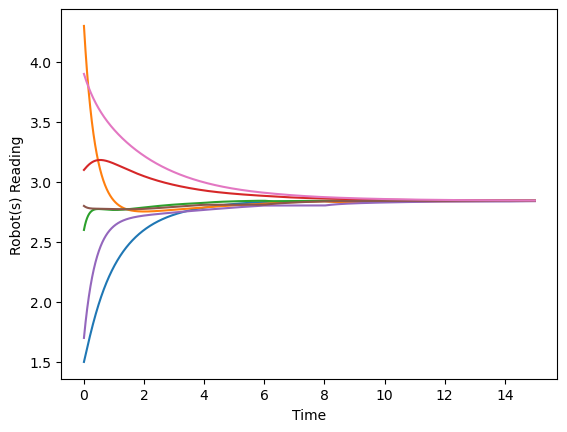

Number of Switches:  149


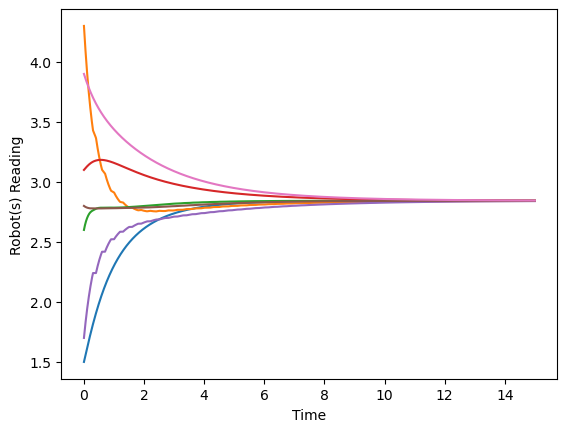

In [7]:

Edges_4a = [(0, 2), (1, 2), (2, 1), (2, 0), (1, 4), (4, 1), (2, 5), (5, 2), (2, 3), (3, 2), (3, 6), (6, 3)]
Edges_4b = [(0, 2), (1, 2), (2, 1), (2, 0), (1, 4), (4, 1), (2, 3), (3, 2), (3, 6), (6, 3)]
Edges_4c = [(0, 2), (1, 2), (2, 1), (2, 0), (2, 5), (5, 2), (2, 3), (3, 2), (3, 6), (6, 3)]

x_0=np.array([1.5,4.3,2.6,3.1,1.7,2.8,3.9]) #Random initial vector of x positions
Vertices = [0, 1, 2, 3, 4, 5, 6]
T=15


Ls = [getLaplacianMatrix(Edges_4a,Vertices), getLaplacianMatrix(Edges_4b,Vertices), getLaplacianMatrix(Edges_4c,Vertices)]
simulate_consensusSwitch(x_0, T, Ls, 2, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls, 0.1, dt =0.001)

The graph for 0.1s presents some oscillating behavior, while the 2s is smoother. 

### Exercise 5

1. The way the graphs are in its current state, won't allow convergence as none contains a rooted out branching.
2. Once graphs from figure 3 and 4 are analyzed through the union of each one, both contain a Rooted Out Branch, therefore they will converge.
3. 

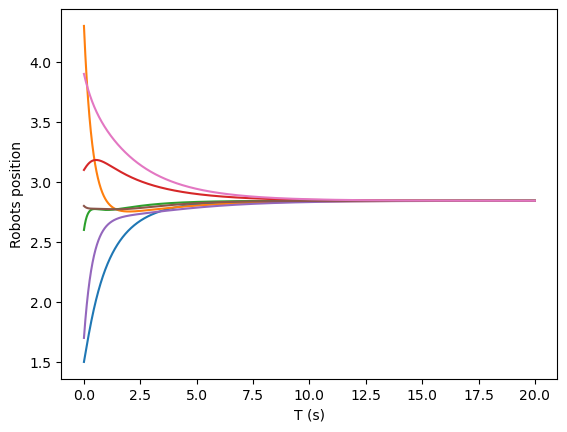

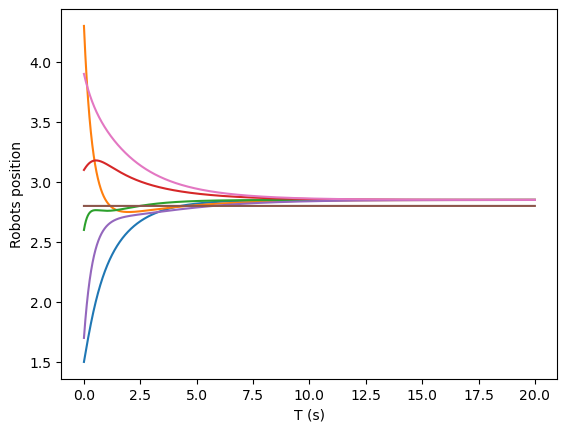

Number of Switches:  39


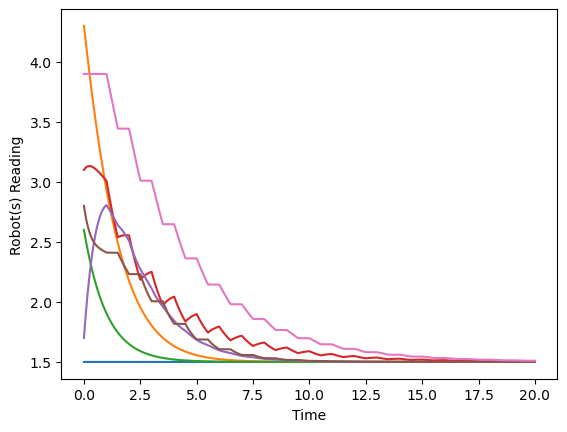

In [8]:
Edges_5a = [[0, 2], [2, 1], [1, 4], [4, 5], [2, 5], [2, 3], [6, 3]]
Edges_5b = [[0, 2], [2, 1], [1, 4], [2, 3], [3, 6], [5,4]]

Vertices = [0, 1, 2, 3, 4, 5, 6]

x_0=np.array([1.5,4.3,2.6,3.1,1.7,2.8,3.9]) #Random initial vector of x positions
T=20

switchingGraphs = [Edges_4a, Edges_4b]
Ls3 = [getLaplacianMatrix(Edges_5a,Vertices), getLaplacianMatrix(Edges_5b,Vertices)]
simConsensus(x_0, T, Ls[0], dt =0.001)
simConsensus(x_0, T, Ls[1], dt =0.001)
simulate_consensusSwitch(x_0, T, Ls3, 0.5, dt =0.001)


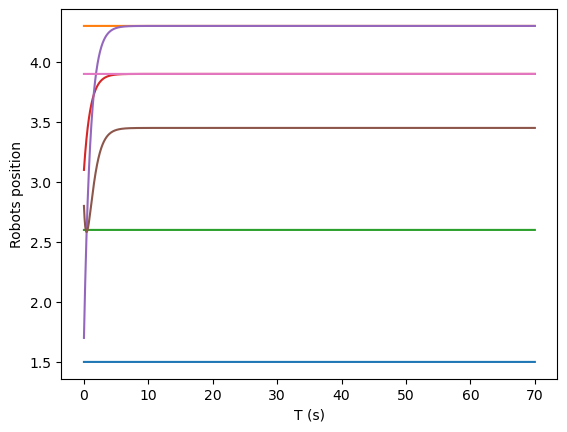

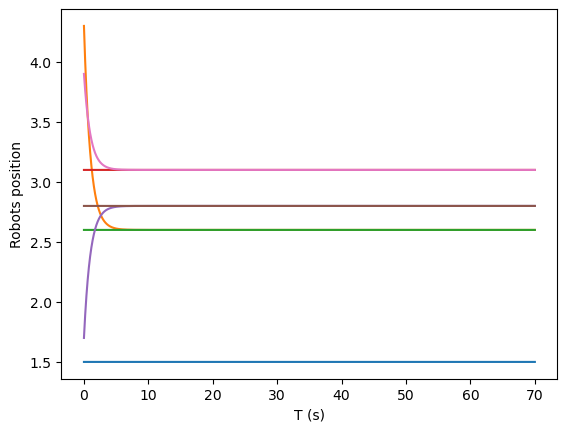

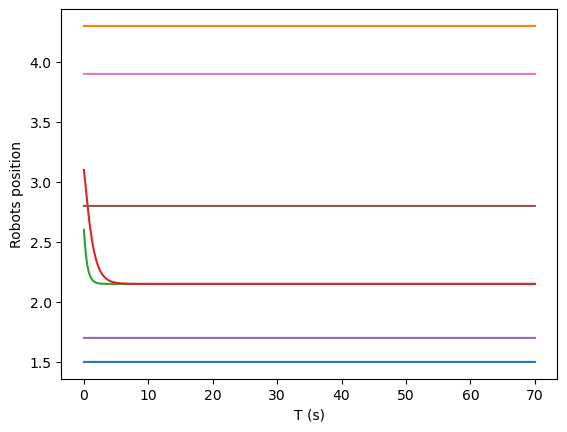

Number of Switches:  139


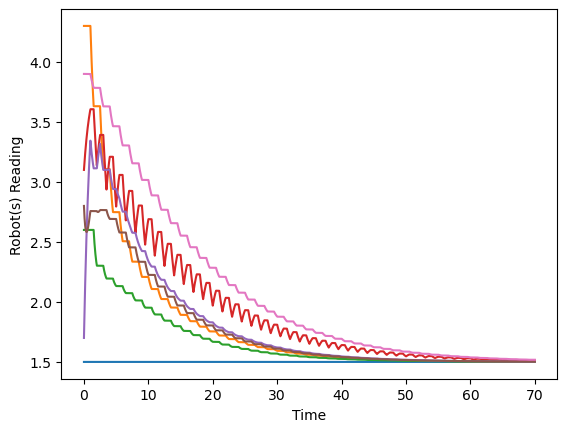

In [9]:
Edges_54a=[[1,4],[2,5],[4,5],[6,3]]
Edges_54b=[[2,1],[3,6],[5,4]]
Edges_54c=[[0,2],[5,2],[2,3]]

Vertices = [0, 1, 2, 3, 4, 5, 6]
x_0=np.array([1.5,4.3,2.6,3.1,1.7,2.8,3.9]) #Random initial vector of x positions
T=70

simConsensus(x_0, T, getLaplacianMatrix(Edges_54a,Vertices), dt =0.001)
simConsensus(x_0, T, getLaplacianMatrix(Edges_54b,Vertices), dt =0.001)
simConsensus(x_0, T, getLaplacianMatrix(Edges_54c,Vertices), dt =0.001)

Ls4 = [getLaplacianMatrix(Edges_54a,Vertices), getLaplacianMatrix(Edges_54b,Vertices), getLaplacianMatrix(Edges_54c,Vertices)]
simulate_consensusSwitch(x_0, T, Ls4, 0.5, dt =0.001)


4. Switching graphs

Number of Switches:  199


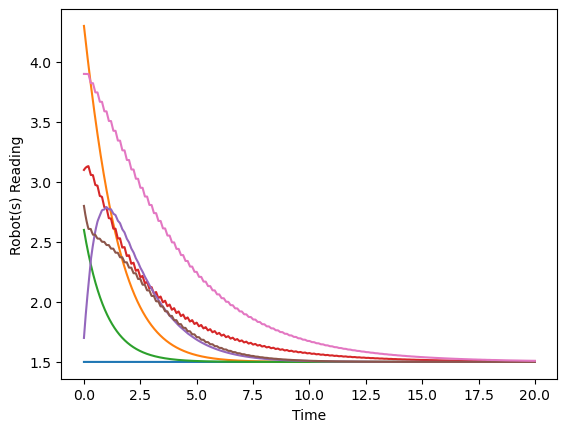

Number of Switches:  66


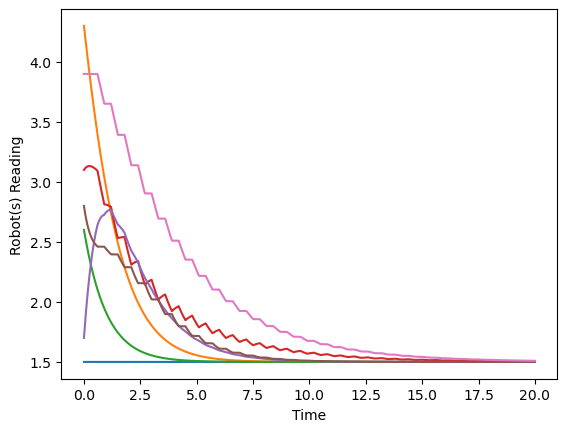

Number of Switches:  19


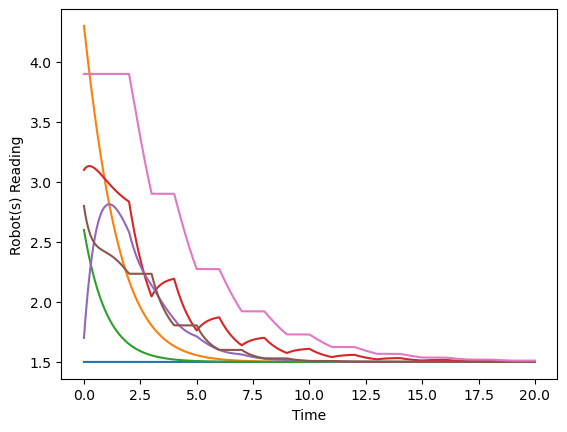

Number of Switches:  9


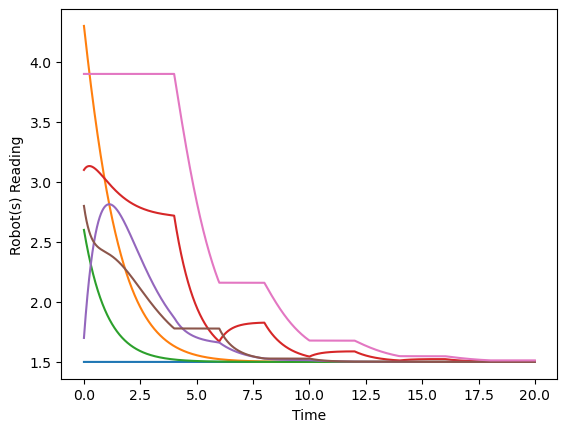

Number of Switches:  999


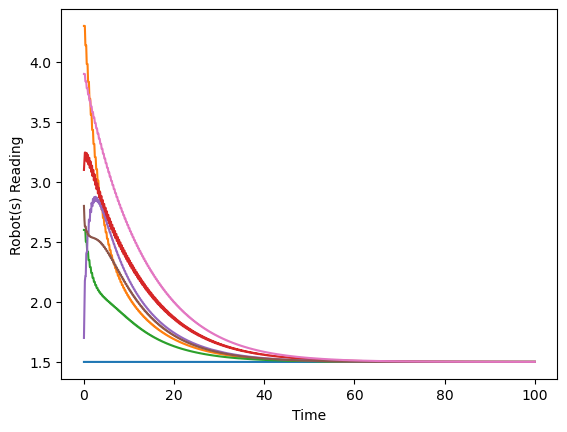

Number of Switches:  333


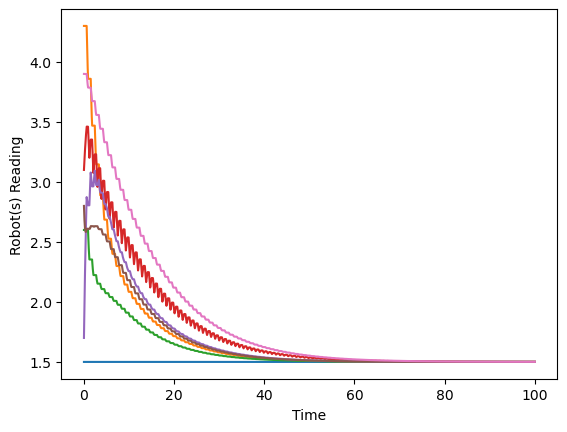

Number of Switches:  99


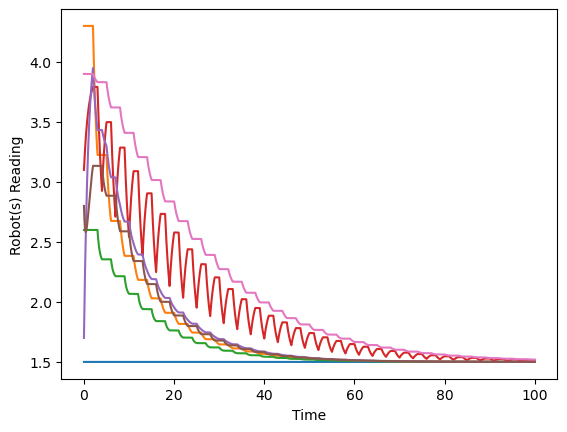

Number of Switches:  49


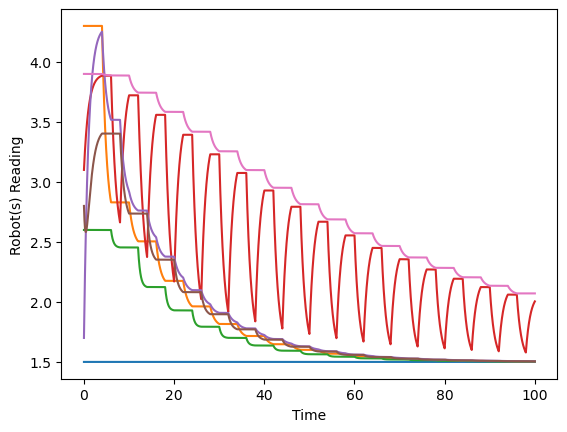

In [10]:
T=20
simulate_consensusSwitch(x_0, T, Ls3, 0.1, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls3, 0.3, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls3, 1, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls3, 2, dt =0.001)

T=100
simulate_consensusSwitch(x_0, T, Ls4, 0.1, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls4, 0.3, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls4, 1, dt =0.001)
simulate_consensusSwitch(x_0, T, Ls4, 2, dt =0.001)

Convergence is much slower when the switching time increases.

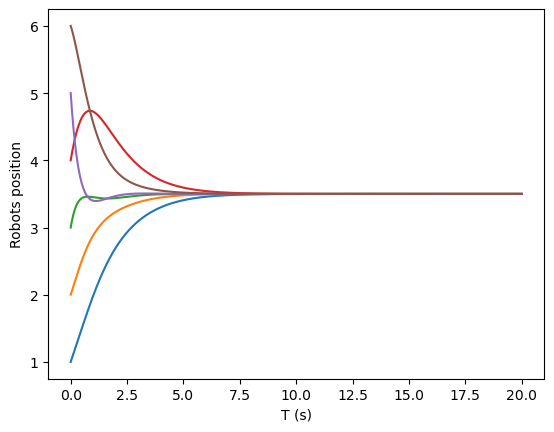

In [23]:
vertices=[0,1,2,3,4,5]
x0=[1,2,3,4,5,6]
edgesA=[ (0, 1), (2, 1),(0,2), (3, 2),  (2, 4), (4, 5),(3,5)]
edgesB=[(1, 0), (2, 1), (4, 2), (0, 4), (3, 4), (4, 5), (5, 3)]
edgesC=[(1, 0), (2, 1), (4, 2), (0, 4), (3, 4), (5, 3)]
simConsensus(x0, T, getLaplacianMatrix(edgesB,vertices), dt =0.001)
T=20